## Introduction to Matplib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
plt.style.available


['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [23]:
plt.style.use("seaborn-v0_8-whitegrid")

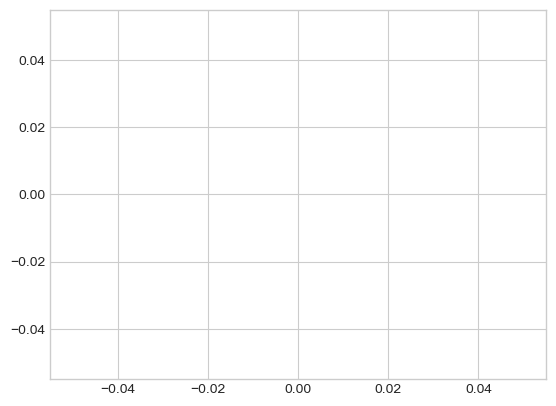

In [25]:
plt.plot();

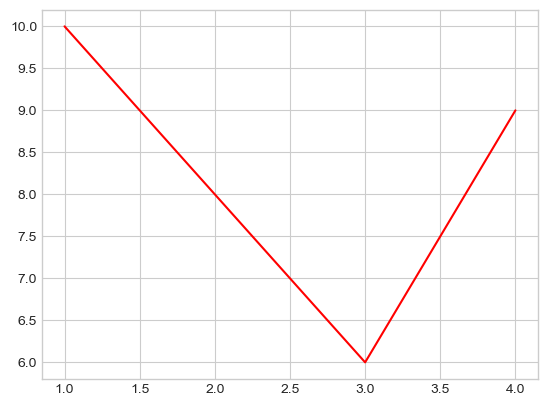

In [27]:
x = [1,2,3,4]
y = [10,8,6,9]
plt.plot(x,y,color = "red") # put ; to remove

### Pylot API vs Object-Oriented API
* Pyplot API -> Quickly
* OO API -> Advanced

##### Pypload API

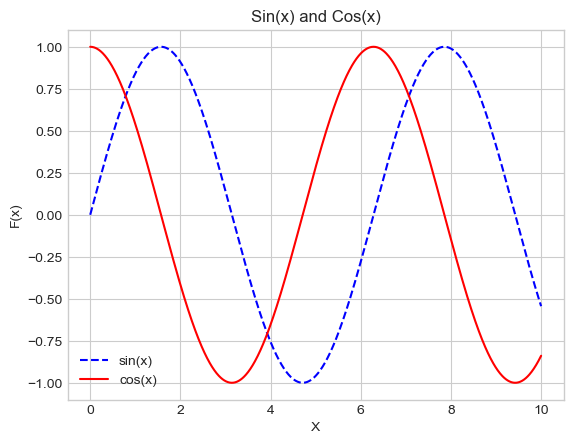

In [77]:
x = np.linspace(0,10,1000)
plt.plot(x,np.sin(x),color = "blue",linestyle = "dashed",label = "sin(x)");
plt.plot(x,np.cos(x),color = "red",label = "cos(x)")

plt.title("Sin(x) and Cos(x)")
plt.xlabel("X")
plt.ylabel("F(x)")

#plt.xlim(0,4)
#plt.ylim(-0.7,0.6)
#plt.axis(0,4,-0.7,0.6)
#plt.axis("tight")
#plt.axis("equal")

plt.legend();

##### Object-oriented API

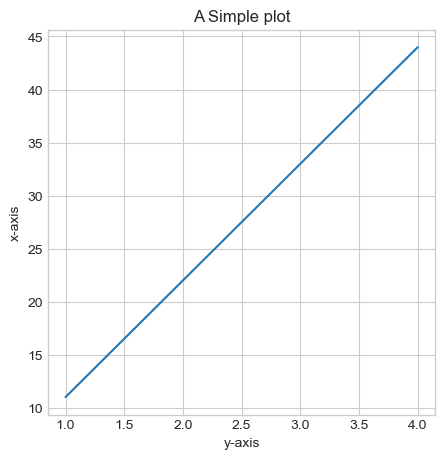

In [39]:
#1j prepare data 
x = [1,2,3,4]
y = [11,22,33,44]

#2 setup plot
fig,ax = plt.subplots(figsize = (5,5)) # Figure size = width & height of the plot

#3 plot the data
ax.plot(x,y)
ax.set(title = "A Simple plot",xlabel = "y-axis",ylabel = "x-axis");

## 2. Most common types of Matplotlib plots
* line
* scatter
* bar
* hist
* subplots()

In [46]:
# create an array
x = np.linspace(0,10,1000)
x[:5]

array([0.        , 0.01001001, 0.02002002, 0.03003003, 0.04004004])

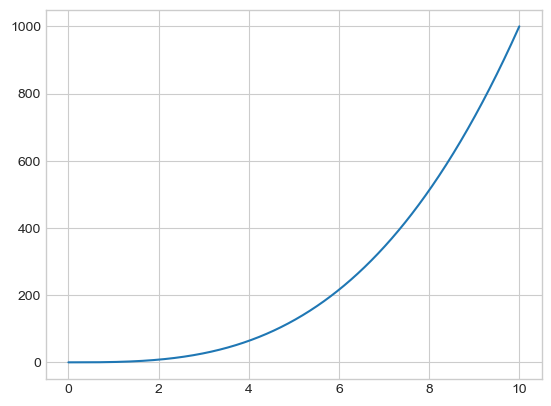

In [48]:
# OO API plot a line chart

fig,ax = plt.subplots()
ax.plot(x,x**3)

##### Scatter


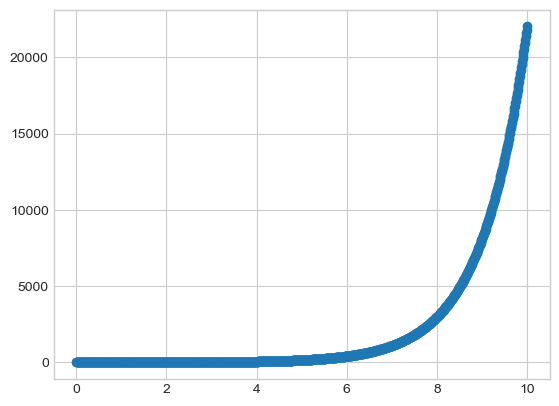

In [51]:
# Pyplot API
plt.scatter(x,np.exp(x)); #y = e^(X)

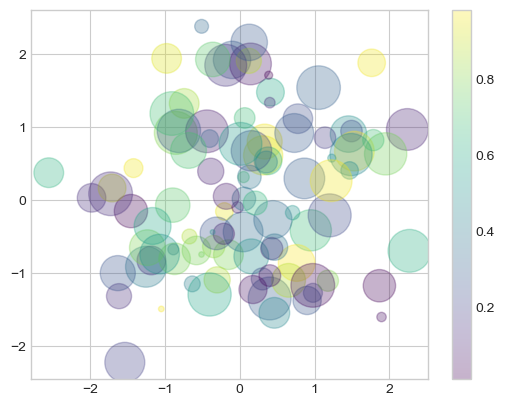

In [75]:
# OO API
#Prepare new Data
rng = np.random.RandomState(0)

x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000* rng.rand(100)
fig,ax = plt.subplots()
img1 = ax.scatter(x,y,s = sizes,c=colors,cmap = 'viridis',alpha = 0.3)
fig.colorbar(img1);

### 3. Bar
* Vertical
* Horizontal

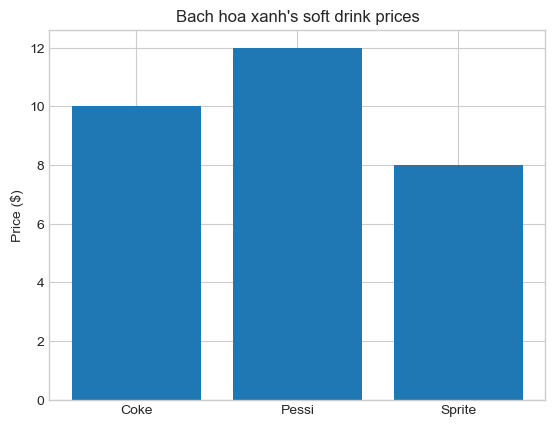

In [94]:
# Prepare Data from a python dictionary
soft_drink_prices = {"Coke":10,"Pessi":12,"Sprite":8}

fig,ax = plt.subplots()
ax.bar(soft_drink_prices.keys(),soft_drink_prices.values());
ax.set(title = "Bach hoa xanh's soft drink prices",ylabel = 'Price ($)');

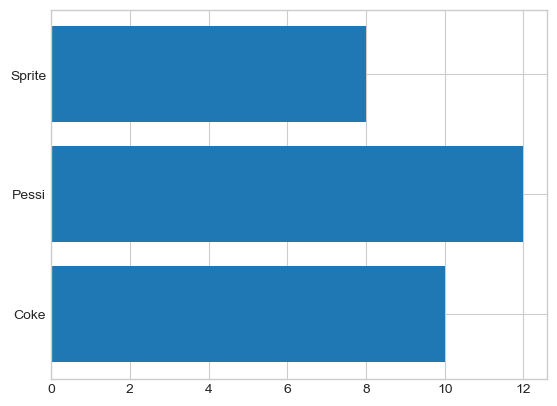

In [98]:
fig,ax = plt.subplots()
ax.barh(list(soft_drink_prices.keys()),list(soft_drink_prices.values()));

##### 4 Histogram


In [111]:
# Prepare data
np.random.seed(42)

student_height = np.random.normal(170,10,250)

In [113]:
student_height[:10]

array([174.96714153, 168.61735699, 176.47688538, 185.23029856,
       167.65846625, 167.65863043, 185.79212816, 177.67434729,
       165.30525614, 175.42560044])

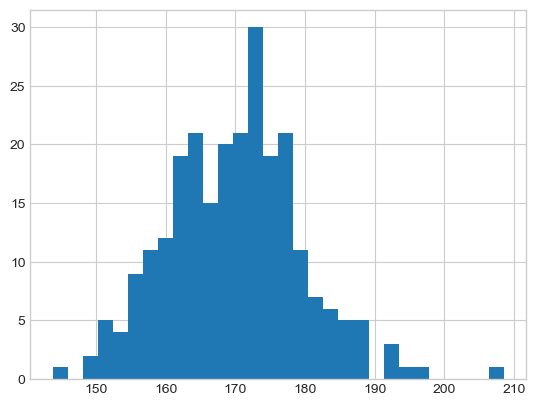

In [117]:
# pyplot API
plt.hist(student_height,bins=30);

### Subplots
* Multiple plots on one figure

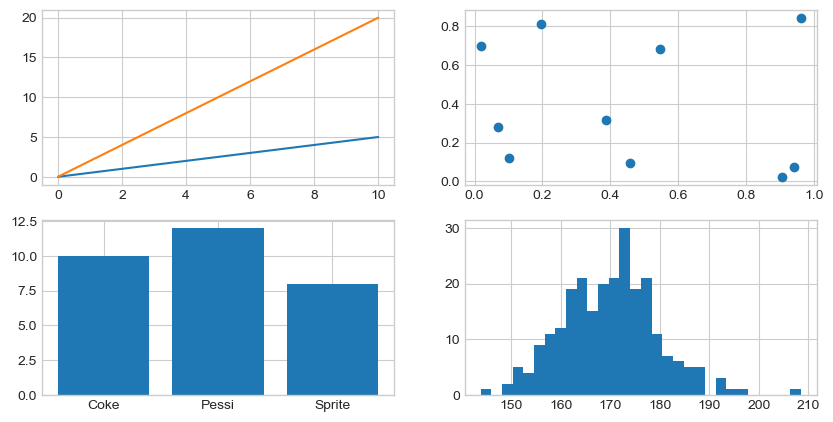

In [136]:
# Option 1:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows =2 ,ncols=2,figsize=(10,5))

# Plot data to each axis
ax1.plot(x,x/2)
ax1.plot(x,x*2)

ax2.scatter(np.random.random(10),np.random.random(10))

ax3.bar(soft_drink_prices.keys(),soft_drink_prices.values());

ax4.hist(student_height,bins=30);

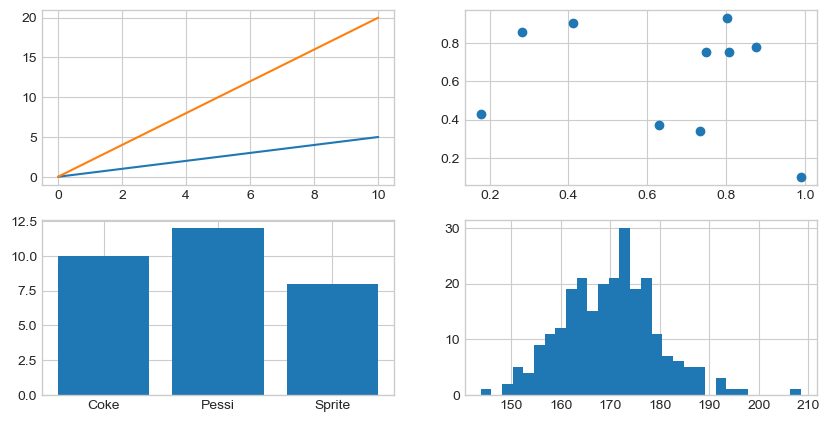

In [150]:
# Option 2:
fig,ax = plt.subplots(nrows =2,ncols=2,figsize =(10,5))

#Plot data to each axis
ax[0,0].plot(x,x/2)
ax[0,0].plot(x,x*2)
ax[0,1].scatter(np.random.random(10),np.random.random(10))

ax[1,0].bar(soft_drink_prices.keys(),soft_drink_prices.values());

ax[1,1].hist(student_height,bins=30);



## Poject Data Visualization - Califormia California Cities

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
cities = pd.read_csv('california_cities.csv')
cities.head(5)
cities['area_total_km2'].sort_values(ascending = False)

239    1302.000
367     964.510
55      527.401
375     466.109
26      371.946
         ...   
163         NaN
237         NaN
370         NaN
393         NaN
443         NaN
Name: area_total_km2, Length: 482, dtype: float64

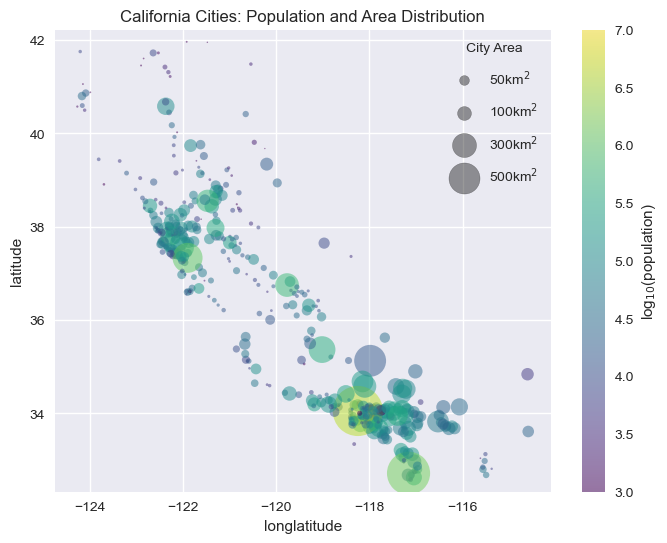

In [77]:
# Extract latd = Vĩ độ and Longd = Kinh độ
lat,lon = cities['latd'],cities['longd']
population,areas = cities['population_total'],cities["area_total_km2"]
#Plot using Pyplot API
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(8,6))
plt.scatter(lon,lat,c=np.log10(population),cmap = "viridis",s = areas,linewidths=0,alpha = 0.5)
plt.axis("equal")
plt.xlabel("longlatitude")
plt.ylabel("latitude")
plt.colorbar(label = 'log$_{10}$(population)')
plt.clim(3,7)

#Create a legend for cities sizes
area_range = [50,100,300,500]
for area in area_range:
    plt.scatter([],[],s=area,label=str(area)+'km$^2$',c='k',alpha = 0.4)
plt.legend(scatterpoints =1,labelspacing =1,title="City Area" )
plt.title("California Cities: Population and Area Distribution");